# Bagging, Random Forest and Boosting

In machine learning, improving the accuracy and robustness of predictive models is crucial. Four key concepts commonly applied in ensemble learning are bagging, random forests, and boosting. Each technique offers unique strategies to enhance the accuracy and generalization of models.

### Bagging (Bootstrap Aggregating):
Bagging reduces variance by generating multiple instances of a base model using random subsets of the training dataset. These models are trained independently, and their predictions are aggregated to produce a final prediction. Bagging improves model stability and generalization by leveraging the diversity of independently trained models.

### Random Forests:
Random forests extend bagging by introducing additional randomness during the construction of each decision tree. This randomness further enhances the model's ability to generalize to unseen data, making random forests a powerful ensemble learning technique.

### Boosting:
Boosting sequentially builds a series of base models, with each subsequent model attempting to correct the errors of its predecessor. Instances that are misclassified by the current model are assigned higher weights, emphasizing their importance in subsequent iterations. Boosting aims to reduce both bias and variance, leading to improved model performance.

In this notebook, we will explore these concepts in more detail and implement them using Python's scikit-learn library. We will train and evaluate models using bagging, random forests, and boosting, demonstrating their effectiveness in various machine learning tasks. Let's dive into the code to see these techniques in action.

In [2]:
#Import all the libraries needed in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
#Downloading the data, the training and the test set
data = pd.read_csv("Data.csv")
data_test = pd.read_csv("test_set.csv") 
data_train = pd.read_csv("train_set.csv")

# Carica il dataset PCA completo
data_pca = pd.read_csv('data_pca.csv')
data_train_pca = pd.read_csv('train_set_pca.csv')
data_test_pca = pd.read_csv('test_set_pca.csv')

In [4]:
#Separating the feature from the outcome
X_train = data_train.drop('diagnosis', axis=1)
y_train = data_train['diagnosis']
X_test = data_test.drop('diagnosis', axis=1)
y_test = data_test['diagnosis']


In [5]:
X_train_pca = data_train_pca.drop('diagnosis', axis=1)
y_train_pca = data_train_pca['diagnosis']
X_test_pca = data_test.drop('diagnosis', axis=1)
y_test_pca = data_test['diagnosis']

## Bagging of Trees

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the base decision tree model
base_model = DecisionTreeClassifier(random_state=87)

# Initialize the BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50, random_state=87)

# Train the BaggingClassifier on the training data
bagging_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_bagging = bagging_model.predict(X_test)

# Calculate accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)


Bagging Accuracy: 0.9627906976744186


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier with default parameters
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=87)

# Train the RandomForestClassifier on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9674418604651163


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate metrics for Bagging model
print("Bagging Model Metrics:")
# Train set metrics
y_train_pred_bagging = bagging_model.predict(X_train)
train_accuracy_bagging = accuracy_score(y_train, y_train_pred_bagging)
tn_train_bagging, fp_train_bagging, fn_train_bagging, tp_train_bagging = confusion_matrix(y_train, y_train_pred_bagging).ravel()
train_specificity_bagging = tn_train_bagging / (tn_train_bagging + fp_train_bagging)
train_sensitivity_bagging = tp_train_bagging / (tp_train_bagging + fn_train_bagging)
print("Train Set Accuracy:", train_accuracy_bagging)
print("Train Set Specificity:", train_specificity_bagging)
print("Train Set Sensitivity (Recall):", train_sensitivity_bagging)
print("Train Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_bagging))

# Test set metrics
y_test_pred_bagging = bagging_model.predict(X_test)
test_accuracy_bagging = accuracy_score(y_test, y_test_pred_bagging)
tn_test_bagging, fp_test_bagging, fn_test_bagging, tp_test_bagging = confusion_matrix(y_test, y_test_pred_bagging).ravel()
test_specificity_bagging = tn_test_bagging / (tn_test_bagging + fp_test_bagging)
test_sensitivity_bagging = tp_test_bagging / (tp_test_bagging + fn_test_bagging)
print("\nTest Set Accuracy:", test_accuracy_bagging)
print("Test Set Specificity:", test_specificity_bagging)
print("Test Set Sensitivity (Recall):", test_sensitivity_bagging)
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_bagging))

# Calculate metrics for Random Forest model
print("\nRandom Forest Model Metrics:")
# Train set metrics
y_train_pred_rf = random_forest_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
tn_train_rf, fp_train_rf, fn_train_rf, tp_train_rf = confusion_matrix(y_train, y_train_pred_rf).ravel()
train_specificity_rf = tn_train_rf / (tn_train_rf + fp_train_rf)
train_sensitivity_rf = tp_train_rf / (tp_train_rf + fn_train_rf)
print("Train Set Accuracy:", train_accuracy_rf)
print("Train Set Specificity:", train_specificity_rf)
print("Train Set Sensitivity (Recall):", train_sensitivity_rf)
print("Train Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rf))

# Test set metrics
y_test_pred_rf = random_forest_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
tn_test_rf, fp_test_rf, fn_test_rf, tp_test_rf = confusion_matrix(y_test, y_test_pred_rf).ravel()
test_specificity_rf = tn_test_rf / (tn_test_rf + fp_test_rf)
test_sensitivity_rf = tp_test_rf / (tp_test_rf + fn_test_rf)
print("\nTest Set Accuracy:", test_accuracy_rf)
print("Test Set Specificity:", test_specificity_rf)
print("Test Set Sensitivity (Recall):", test_sensitivity_rf)
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))


Bagging Model Metrics:
Train Set Accuracy: 1.0
Train Set Specificity: 1.0
Train Set Sensitivity (Recall): 1.0
Train Set Confusion Matrix:
[[253   0]
 [  0 246]]

Test Set Accuracy: 0.9627906976744186
Test Set Specificity: 0.9423076923076923
Test Set Sensitivity (Recall): 0.9819819819819819
Test Set Confusion Matrix:
[[ 98   6]
 [  2 109]]

Random Forest Model Metrics:
Train Set Accuracy: 1.0
Train Set Specificity: 1.0
Train Set Sensitivity (Recall): 1.0
Train Set Confusion Matrix:
[[253   0]
 [  0 246]]

Test Set Accuracy: 0.9674418604651163
Test Set Specificity: 0.9326923076923077
Test Set Sensitivity (Recall): 1.0
Test Set Confusion Matrix:
[[ 97   7]
 [  0 111]]


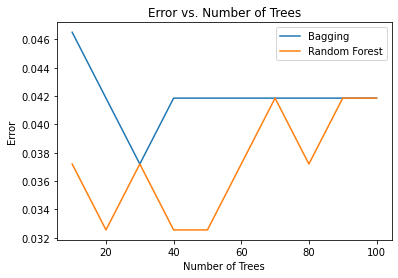

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Lista dei numeri di alberi da testare
num_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# List to store errors for Bagging and Random Forest
errors_bagging = []
errors_rf = []

# Calculate error for each number of trees
for n in num_trees:
    # Initialize Bagging and Random Forest models with n trees
    bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=n, random_state=60)
    random_forest_model = RandomForestClassifier(n_estimators=n, random_state=60)
    
    # Train Bagging model
    bagging_model.fit(X_train, y_train)
    # Predict on test data
    y_pred_bagging = bagging_model.predict(X_test)
    # Calculate error
    error_bagging = 1 - accuracy_score(y_test, y_pred_bagging)
    errors_bagging.append(error_bagging)
    
    # Train Random Forest model
    random_forest_model.fit(X_train, y_train)
    # Predict on test data
    y_pred_rf = random_forest_model.predict(X_test)
    # Calculate error
    error_rf = 1 - accuracy_score(y_test, y_pred_rf)
    errors_rf.append(error_rf)

# Plot errors for Bagging and Random Forest
plt.plot(num_trees, errors_bagging, label='Bagging')
plt.plot(num_trees, errors_rf, label='Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Error vs. Number of Trees')
plt.legend()
plt.show()

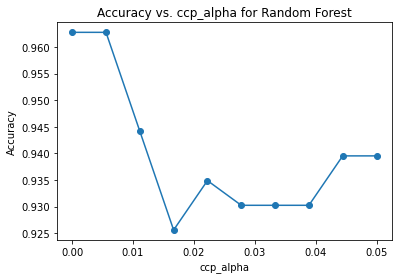

In [40]:
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracy and ccp_alpha values
ccp_alphas = []
accuracies = []

# Train Random Forest model with different ccp_alpha values
for ccp_alpha in np.linspace(0, 0.05, 10):  # Try different ccp_alpha values
    # Initialize Random Forest model with current ccp_alpha
    random_forest_model = RandomForestClassifier(n_estimators=50, random_state=78, ccp_alpha=ccp_alpha)
    
    # Train the model
    random_forest_model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred_rf = random_forest_model.predict(X_test)
    
    # Calculate accuracy and store ccp_alpha and accuracy values
    accuracy = accuracy_score(y_test, y_pred_rf)
    accuracies.append(accuracy)
    ccp_alphas.append(ccp_alpha)

# Plot accuracy vs. ccp_alpha
plt.plot(ccp_alphas, accuracies, marker='o', linestyle='-')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. ccp_alpha for Random Forest')
plt.show()


In [41]:
# Choose a specific value of ccp_alpha
chosen_alpha = 0.05  # Change this value as desired

# Initialize Random Forest model with the chosen ccp_alpha for pruning
chosen_alpha_random_forest_model = RandomForestClassifier(n_estimators= 10, random_state=78, ccp_alpha=0.05)

# Train the model
chosen_alpha_random_forest_model.fit(X_train, y_train)

# Evaluate the model
y_pred_chosen_alpha = chosen_alpha_random_forest_model.predict(X_test)
accuracy_chosen_alpha = accuracy_score(y_test, y_pred_chosen_alpha)
print("Random Forest Accuracy with chosen alpha:", accuracy_chosen_alpha)


Random Forest Accuracy with chosen alpha: 0.9255813953488372


In [43]:
# Define the base decision tree model
base_model = DecisionTreeClassifier(random_state=87)

# Initialize the BaggingClassifier with 10 trees
bagging_model_10 = BaggingClassifier(base_estimator=base_model, n_estimators=10, random_state=87)

# Train the BaggingClassifier on the training data
bagging_model_10.fit(X_train, y_train)

# Predict on the testing data
y_pred_bagging_10 = bagging_model_10.predict(X_test)

# Calculate accuracy
accuracy_bagging_10 = accuracy_score(y_test, y_pred_bagging_10)
print("Bagging (10 Trees) Accuracy:", accuracy_bagging_10)

Bagging (10 Trees) Accuracy: 0.958139534883721


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate metrics for Bagging model
print("Bagging Model Metrics (with 10 trees):")
# Train set metrics
y_train_pred_bagging = bagging_model_10.predict(X_train)
train_accuracy_bagging = accuracy_score(y_train, y_train_pred_bagging)
tn_train_bagging, fp_train_bagging, fn_train_bagging, tp_train_bagging = confusion_matrix(y_train, y_train_pred_bagging).ravel()
train_specificity_bagging = tn_train_bagging / (tn_train_bagging + fp_train_bagging)
train_sensitivity_bagging = tp_train_bagging / (tp_train_bagging + fn_train_bagging)
print("Train Set Accuracy:", train_accuracy_bagging)
print("Train Set Specificity:", train_specificity_bagging)
print("Train Set Sensitivity (Recall):", train_sensitivity_bagging)
print("Train Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_bagging))

# Test set metrics
y_test_pred_bagging = bagging_model_10.predict(X_test)
test_accuracy_bagging = accuracy_score(y_test, y_test_pred_bagging)
tn_test_bagging, fp_test_bagging, fn_test_bagging, tp_test_bagging = confusion_matrix(y_test, y_test_pred_bagging).ravel()
test_specificity_bagging = tn_test_bagging / (tn_test_bagging + fp_test_bagging)
test_sensitivity_bagging = tp_test_bagging / (tp_test_bagging + fn_test_bagging)
print("\nTest Set Accuracy:", test_accuracy_bagging)
print("Test Set Specificity:", test_specificity_bagging)
print("Test Set Sensitivity (Recall):", test_sensitivity_bagging)
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_bagging))

# Calculate metrics for Random Forest model
print("\nRandom Forest Model Metrics (with chosen alpha):")
# Train set metrics
y_train_pred_rf = chosen_alpha_random_forest_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
tn_train_rf, fp_train_rf, fn_train_rf, tp_train_rf = confusion_matrix(y_train, y_train_pred_rf).ravel()
train_specificity_rf = tn_train_rf / (tn_train_rf + fp_train_rf)
train_sensitivity_rf = tp_train_rf / (tp_train_rf + fn_train_rf)
print("Train Set Accuracy:", train_accuracy_rf)
print("Train Set Specificity:", train_specificity_rf)
print("Train Set Sensitivity (Recall):", train_sensitivity_rf)
print("Train Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rf))

# Test set metrics
y_test_pred_rf = chosen_alpha_random_forest_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
tn_test_rf, fp_test_rf, fn_test_rf, tp_test_rf = confusion_matrix(y_test, y_test_pred_rf).ravel()
test_specificity_rf = tn_test_rf / (tn_test_rf + fp_test_rf)
test_sensitivity_rf = tp_test_rf / (tp_test_rf + fn_test_rf)
print("\nTest Set Accuracy:", test_accuracy_rf)
print("Test Set Specificity:", test_specificity_rf)
print("Test Set Sensitivity (Recall):", test_sensitivity_rf)
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))


Bagging Model Metrics (with 10 trees):
Train Set Accuracy: 0.9979959919839679
Train Set Specificity: 1.0
Train Set Sensitivity (Recall): 0.9959349593495935
Train Set Confusion Matrix:
[[253   0]
 [  1 245]]

Test Set Accuracy: 0.958139534883721
Test Set Specificity: 0.9423076923076923
Test Set Sensitivity (Recall): 0.972972972972973
Test Set Confusion Matrix:
[[ 98   6]
 [  3 108]]

Random Forest Model Metrics (with chosen alpha):
Train Set Accuracy: 0.9218436873747495
Train Set Specificity: 0.924901185770751
Train Set Sensitivity (Recall): 0.9186991869918699
Train Set Confusion Matrix:
[[234  19]
 [ 20 226]]

Test Set Accuracy: 0.9255813953488372
Test Set Specificity: 0.875
Test Set Sensitivity (Recall): 0.972972972972973
Test Set Confusion Matrix:
[[ 91  13]
 [  3 108]]


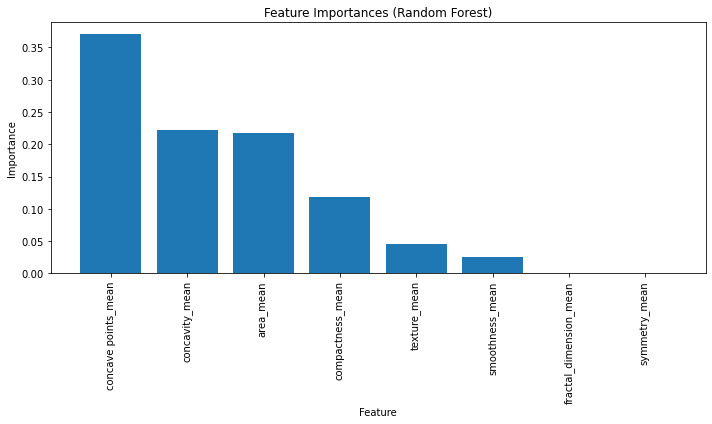

In [45]:
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances = chosen_alpha_random_forest_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()